# Installation

You can get started with Neo4j many ways, but these 3 are recommended:
1. Neo4j Desktop   (https://neo4j.com/download/)
2. Neo4j Sandbox   (https://neo4j.com/sandbox-v2/)
3. Neo4j Aura   (https://neo4j.com/aura/)

Go to one of the links, follow the steps and install the Neo4j.  
Raise an issue if you bump into any problem in any of these steps. I will make sure to fix it.

# The Data

Let's say you have a friend called Emily and she loves Pizza

(Side Note: "Emily Loves Pizza" is a menu item at a nearby restaurant. Someone named Emily must be really loving Pizza so much so that they have named a pizza after her.)

We can visualize the information that Emily Loves Pizza like this following:

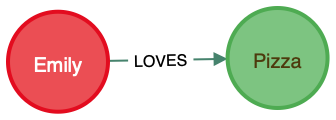

Here "Emily" and "Pizza" are NODES
and the connection between them which is "LOVES" is a RELATIONSHIP.

This is the pretty much the bulk of the Graph Databases. Graph Databases are all about storing this type of relationship data and making ton of different queries on it. 

The everyday products such as Google Search, Google Maps rise on the idea of Graph. In Google Search, pages are connected to each other. We see the most popular websites based on the Page Rank algoritm. In Google Maps, streets are connected to each other and we find the directions based on the Shortest Path algoritms. The applications of graph database are endless.

Let's now look at the data items in the "Emily Loves Pizza" information:

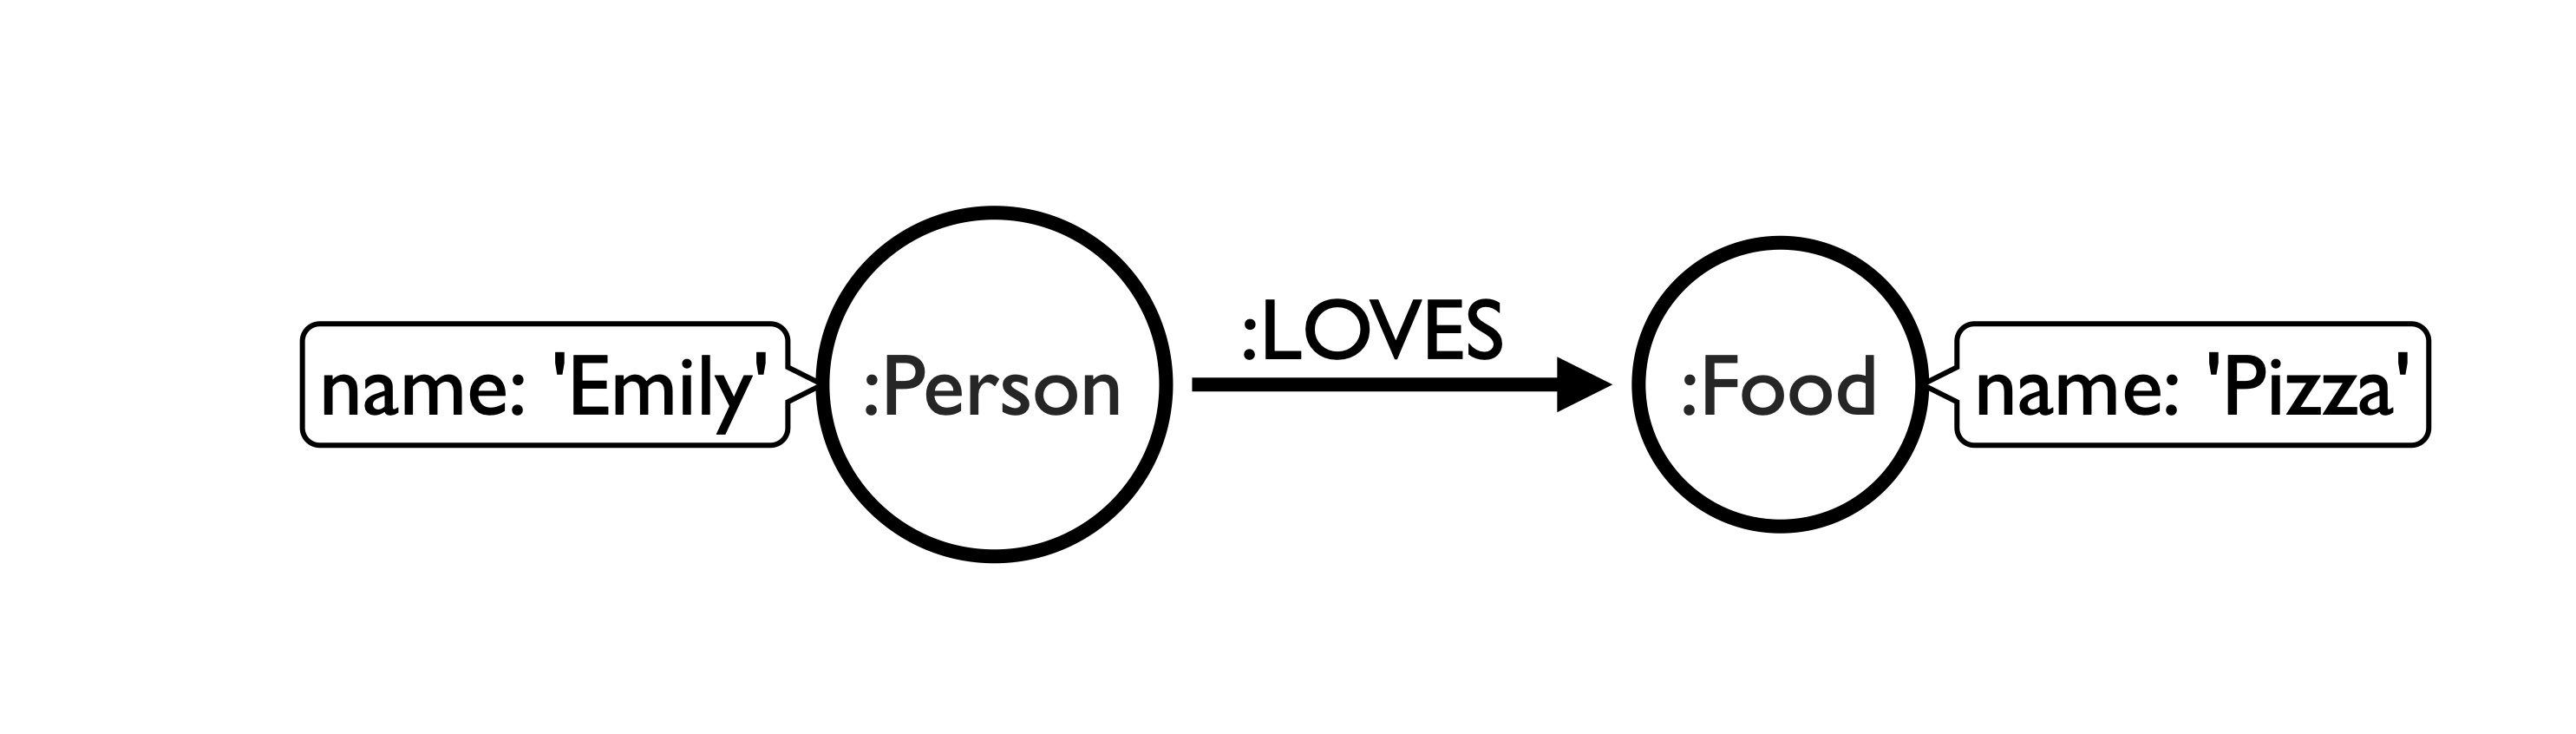

Here the ":Person", ":LOVES" and ":Food" are the labels. "name" is the property. Labels are required, properties are not required in Neo4j. 

You can consider labels as clasess for Nodes and Relationships. If we had to insert another person called "Peter" to the database, we would give the ":Person" label to it. And, later on we could query all the ":Person" nodes and get the information about "Peter" and "Emily" excluding the unnecessary information about the "Pizza"

# Cypher

The default language for Neo4j is ```Cypher```. The basic structure of Cypher is like the following:
```
() - [] -> ()
```
Here the parantheses are the Nodes and squared brackets are the relationships:
```
(Node) - [Relationship] -> (Node)
```
Labels and the properties are represented like the following:
```
(:NodeLabel {properties}) - [:RelationshipLabel] -> (:NodeLabel {properties})
```
The "Emily Loves Pizza" relationship can be represented like the following:
```
(:Person {name: 'Emily'}) - [:LOVES] -> (:Food {name:'Pizza'})
```
If we need to import this data into data in Neo4j, we only have to run this:
```
MERGE (:Person {name: 'Emily'}) - [:LOVES] -> (:Food {name:'Pizza'})
```
MERGE checks if the nodes and relationships are already stored, if not stored it creates them. If stored, does nothing (Hence prevents duplicates)

### _Exercise:_   
Please write the Cypher query for "Patrick Follows Neo4j"

# Connect to Neo4j (Option 1: Neo4j driver) - Fastest Option

The only job of the Neo4j driver is to execute the ```Cypher``` statements. This is both the advantage and disadvantage of connecting to Neo4j with driver.   
    
Advantage:    
This type connection gives the fastest response time. This is because both Python and Neo4j doesn't spend time interpreting the statements. Python only sends the ```Cypher``` statements and since ```Cypher``` is the default language of Neo4j, Neo4j easily evaluates the statement and gives the response.

Disadvantage:    
For the developers, ```Cypher``` will be an additional language to learn. If you want to learn more about ```Cypher```, here are some resources
Official resources: https://neo4j.com/developer/cypher-query-language/
A nice Udemy course: 

In [248]:
# install the driver
! pip install neo4j

  Created wheel for neo4j: filename=neo4j-1.7.5-cp37-none-any.whl size=32521 sha256=d6d36c45296d12f469b0ac2e4e6d4157e1c56eb196104461d5fa275e9616d175
  Stored in directory: /Users/ybaktir/Library/Caches/pip/wheels/c0/dc/2e/6a26c3a5c63bb49a81092caa5ee48895971c0f229ee7900e7d
Successfully built neo4j


In [263]:
# Connect and Create Data
from neo4j import GraphDatabase
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "password"))
session = driver.session()

query = "MERGE (:Person {name: 'Emily'}) - [:LOVES] -> (:Food {name:'Pizza'})"

session.run(query)

In [264]:
# Query
query = "match (n1)-[rel]->(n2) return n1.name, type(rel), n2.name"
results = session.run(query)
list(results)

[<Record n1.name='Emily' type(rel)='LOVES' n2.name='Pizza'>]

The data format looks a bit different now but we will soon see how to parse it. 

In [262]:
# Delete all records
query = "match (n) detach delete n"
session.run(query)

# Connect to Neo4j (Option 2: py2neo) - Most Convenient Option

py2neo is a big Python library with a huge set of functions that will make your job easier. It is written by Nigel Small, who is the lead engineer at the Neo4j drivers them. He has long years of experience as a Python Developer. So, py2neo is an excellent tool, written by people with deep expertise in Neo4j and Python. 

We will only touch on Graph, Node and Relationship classes but py2neo is a lot more than that. Check out the full set of options here: https://py2neo.org/v4/

In [265]:
from py2neo import Graph, Node, Relationship

In [266]:
uri = "http://localhost:7474/db/data/"
graph = Graph(uri, user="neo4j", password="password")

In [267]:
# "graph" is just a connection that points to http://localhost:7474
graph

<Graph database=<Database uri='http://localhost:7474' secure=False user_agent='py2neo/4.2.0 urllib3/1.24.2 Python/3.7.4-final-0 (darwin)'> name='data'>

In [268]:
# delete all the existing data
# be careful before use
graph.delete_all()

In [270]:
Emily = Node("Person", name="Emily")
Emily

(:Person {name: 'Emily'})

In [273]:
type(Emily)

py2neo.data.Node

In [271]:
Pizza = Node("Food",name="Pizza")
Pizza

(:Food {name: 'Pizza'})

In [274]:
type(Pizza)

py2neo.data.Node

In [272]:
EmilyLovesPizza = Relationship(Emily, "LOVES", Pizza)
EmilyLovesPizza

(Emily)-[:LOVES {}]->(Pizza)

In [275]:
type(EmilyLovesPizza)

py2neo.data.LOVES

In [277]:
# Create the data
graph.create(EmilyLovesPizza)

In [278]:
# Clean the database
graph.delete_all()

# Parsing the response-Neo4j driver

In this example, we collect all the information about the nodes in the database

In [280]:
# You can run the Cypher queries with py2neo
# Create the database
query = "merge (:Person {name:'Emily'})-[:LOVES]->(:Food {name:'Pizza'})"
graph.run(query)

In [393]:
query = """MATCH (n) 
           RETURN id(n) as Id
                 ,labels(n) as Label
                 ,n.name as Name"""
response = session.run(query)
nodes = list(response)
nodes

[<Record Id=21 Label=['Person'] Name='Emily'>,
 <Record Id=22 Label=['Food'] Name='Pizza'>]

In [374]:
# We had seen a result similar to this before but what does this mean?

# Let's check what type of data we have received first

type(nodes[0])

# Oh okay, it is a Record.

neo4j.Record

In [375]:
# Access to the food record like this
nodes[1]

<Record Id=22 Label=['Food'] Name='Pizza'>

In [376]:
# and saves it into another variable
Food_Record = nodes[1]

In [368]:
# this will give all the critical information about the node
Food_Record.data()

{'Id': 22, 'Label': ['Food'], 'Name': 'Pizza'}

In [400]:
# Complete Code:
query = """MATCH (n) 
           RETURN id(n) as Id
                 ,labels(n) as Label
                 ,n.name as Name"""
response = session.run(query)
record_list = []
for record in response:
    record_list.append(record.data())

In [402]:
# list of dicts
record_list

[{'Id': 21, 'Label': ['Person'], 'Name': 'Emily'},
 {'Id': 22, 'Label': ['Food'], 'Name': 'Pizza'}]

In [403]:
# pandas dataframe
import pandas as pd
pd.DataFrame(record_list)

,Id,Label,Name
0,21,[Person],Emily
1,22,[Food],Pizza


### _Exercise:_   
Get all the elements of the Person node.

In [ ]:
# Print the label of the Person node:




In [247]:
# Print the properties of the Person node:




In [ ]:
# Print the unique id of the Person node:




# Parsing the response-py2neo

In [389]:
query = """MATCH (n) 
           RETURN id(n) as Id
                 ,labels(n) as Label
                 ,n.name as Name"""

In [390]:
# list of dicts
graph.run(query).data()

[{'Id': 21, 'Label': ['Person'], 'Name': 'Emily'},
 {'Id': 22, 'Label': ['Food'], 'Name': 'Pizza'}]

In [391]:
# pandas dataframe (make sure you have pandas installed)
graph.run(query).to_data_frame()

,Id,Label,Name
0,21,[Person],Emily
1,22,[Food],Pizza
